## Introduction 

- This is a dataset that contains 13 columns (12 feature and 1 target feature) and 299 observations.
- This dataset is a part of a study that worked in determining the implications of two specific features on a prediction model developed to predict heart failure.
***
- In my project, I will be working to *confirm the researcher's claims that serum creatinine and ejection fraction do a better job in model development and accuracy than the sum of all of the features.* This will be done in a python based model development which is different from the techniques used by the researchers. I will refer to these features as the "ideal features."
    - By confirming or denying I will be either fortifying the researcher's argument, or observe a significant drop in accuracy to counter the researcher's argument. In doing so I will also be testing the credibility of the python based regression and procession models.
***
- Additionally, through out the study the researchers themselves split the data features into Numerical and Categorical data points. I went a different route that split the datasets into **Invasive and Non-Invasive.**
- To elaborate:
    - *'Invasive'* would be any feature of the dataset that required some form of invasive procedure on the patient to be retrieved like: blood tests, sample testing, image scans, etc.
    - *'Non-invasive'* would be something as simple as a Yes or No question or a blood pressure reading.
***
- In total it will be three main dataset/models I will be working with.

# In this Notebook (NB2):

In this notebook we will be working on the two features deemed by the researchers as ideal for model development: Serum Creatinine and Ejection Fraction. In addition, we will be doing some different visualization here to see the model's performance.
***
- From the previous notebook I noticed that continuous, numerical features are not the best for predicting the target variable of Death Event. I base this on the very poor performance of the models developed for the Invasive dataset. 
***
**For this notebook I hypothesize that the two ideal features serum creatinine and ejection fraction will not perform well in model development, as they are both continuous values used to predict a non-continuous target.**

### A. Loading Data

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm, datasets
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
import sklearn.preprocessing as preprocessing
import pandas as pd
from sklearn.metrics import plot_roc_curve,auc
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings('ignore')

In [2]:
dataset1=pd.read_csv('heart_failure_dataset.csv') #Reading dataset

In [3]:
df = dataset1.copy() #Make a copy to work with

### B. Splitting Data

- In this situation I will be separating **Serum Creatinine and Ejection Fraction** and the Target feature: Death Event.
- I will be conducting a 70-30 datasplit, this should be enough to train the model and also I will keep it similar to the models in notebook 1 for comparisons.

In [7]:
#Feature Selection: Ideal Features dataset.
data = df[['serum_creatinine','ejection_fraction']].copy()
data_target = df[['DEATH_EVENT']].copy()

In [8]:
#Splitting Data
data_train, data_test, data_target_train, data_target_test = train_test_split(data, data_target, test_size=0.30, random_state=55)

# C. Model Training

###### Classification

In [9]:
#Linear Kernel SVM- Classification
tfsvc1 = svm.SVC(kernel='linear', C=1,gamma= 0.5)
tfsvc1.fit(data_train, data_target_train)
#Accuracy score
print(f'Accuracy Score for the Linear Kernel SVM (tfsvc1) is {tfsvc1.score(data_test, data_target_test):f}')

Accuracy Score for the Linear Kernel SVM (tfsvc1) is 0.744444


In [10]:
#Polynomial Kernel SVM- Classification
tfsvc2 = svm.SVC(kernel='poly', C=1,gamma= 0.5)
tfsvc2.fit(data_train, data_target_train)
#Accuracy score
print(f'Accuracy Score for the Polynomial Kernel SVM (tfsvc2) is {tfsvc2.score(data_test, data_target_test):f}')

Accuracy Score for the Polynomial Kernel SVM (tfsvc2) is 0.744444


In [12]:
#RBF Kernel SVM- Classification
tfsvc3 = svm.SVC(kernel='rbf', C=1,gamma= 0.5)
tfsvc3.fit(data_train, data_target_train)
#Accuracy score
print(f'Accuracy Score for the RBF Kernel SVM (tfsvc3) is {tfsvc3.score(data_test, data_target_test):f}')

Accuracy Score for the RBF Kernel SVM (tfsvc3) is 0.733333


In [14]:
#Logistic Regression for 2 Feature Dataset
tfLR = LogisticRegressionCV(random_state=0, solver='lbfgs',cv=5)
tfLR = tfLR.fit(data_train,np.ravel(data_target_train.values)) 
#Accuracy score
print(f'Accuracy Score of the LR model with the 2 ideal Features is {tfLR.score(data_test,data_target_test):f}')

Accuracy Score of the LR model with the 2 ideal Features is 0.733333


###### Visualization- Classifications

In [15]:
#Meshgrid Set Up.
#'serum_creatinine'- feature 1,
f1_min = data['serum_creatinine'].min() - .5
f1_max = data['serum_creatinine'].max() + .5
#'ejection_fraction'- feature 2
f2_min = data['ejection_fraction'].min() - .5
f2_max = data['ejection_fraction'].max() + .5
sep = 0.05 #step size

In [16]:
#Meshgrid- dataset with all min & max values
f1xx, f2yy = np.meshgrid(np.arange(f1_min, f1_max, sep), np.arange(f2_min, f2_max, sep))
test_data=np.c_[f1xx.ravel(),f2yy.ravel()] 

###### 1. SVM Contour Plots: Linear, Polynomial, RBF.

In [17]:
# Linear Contour Plot
Z1 = tfsvc1.predict(test_data) #prediction values with the model
Z1 = Z1.reshape(f1xx.shape) #shape fitting
#Initially giving Memory Error- which was later fixed by increasing the sep value.

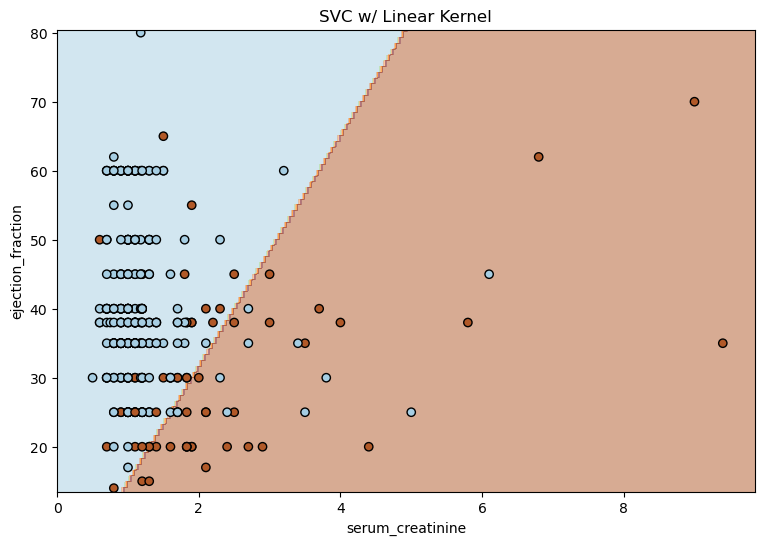

In [26]:
#Plotting: Linear Contour Graph
plt.figure(1, figsize=(9, 6)) #resized to see more data points
plt.contourf(f1xx, f2yy, Z1, cmap=plt.cm.Paired, alpha=0.5)
#Scatter plotting on the graph- with all of the points from the dataset for the 2 features
plt.scatter(data['serum_creatinine'], data['ejection_fraction'], c=df.DEATH_EVENT, edgecolors='k',  cmap=plt.cm.Paired)
plt.xlabel('serum_creatinine')
plt.ylabel('ejection_fraction')
plt.xlim(f1xx.min(), f1xx.max())
plt.title('SVC w/ Linear Kernel')
plt.show()

In [18]:
#Polynomial Contour Plot
Z2 = tfsvc2.predict(test_data) 
Z2 = Z2.reshape(f1xx.shape) 
#Initially giving Memory Error- which was later fixed by increasing the sep value.

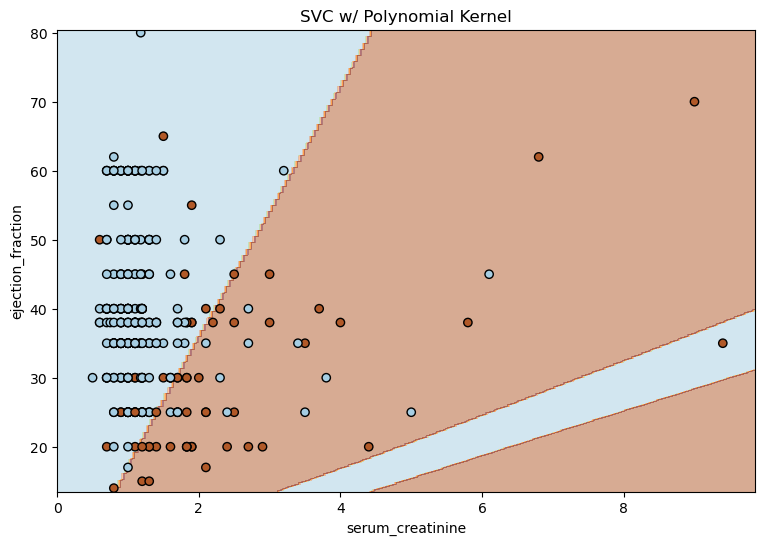

In [31]:
#Plotting: Polynomial Contour Graph
plt.figure(2, figsize=(9, 6)) #resized to see more data points
plt.contourf(f1xx, f2yy, Z2, cmap=plt.cm.Paired, alpha=0.5)
#Scatter plotting on the graph- with all of the points from the dataset for the 2 features
plt.scatter(data['serum_creatinine'], data['ejection_fraction'], c=df.DEATH_EVENT, edgecolors='k',  cmap=plt.cm.Paired)
plt.xlabel('serum_creatinine')
plt.ylabel('ejection_fraction')
plt.xlim(f1xx.min(), f1xx.max())
plt.title('SVC w/ Polynomial Kernel')
plt.show()

In [19]:
#RBF Contour Plot
Z3 = tfsvc3.predict(test_data) 
Z3 = Z3.reshape(f1xx.shape) 
#Initially giving Memory Error- which was later fixed by increasing the sep value.

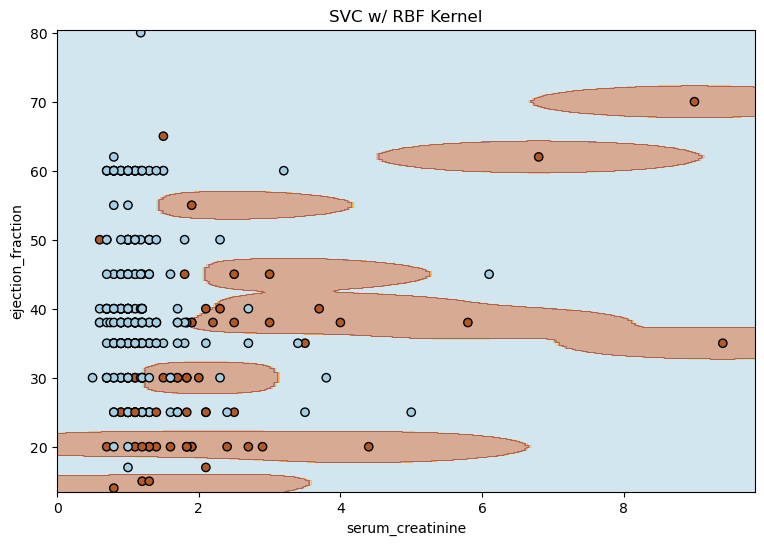

In [32]:
#Plotting: RBF Contour Graph
plt.figure(3, figsize=(9, 6)) #resized to see more data points
plt.contourf(f1xx, f2yy, Z3, cmap=plt.cm.Paired, alpha=0.5)
#Scatter plotting on the graph- with all of the points from the dataset for the 2 features
plt.scatter(data['serum_creatinine'], data['ejection_fraction'], c=df.DEATH_EVENT, edgecolors='k',  cmap=plt.cm.Paired)
plt.xlabel('serum_creatinine')
plt.ylabel('ejection_fraction')
plt.xlim(f1xx.min(), f1xx.max())
plt.title('SVC w/ RBF Kernel')
plt.show()

###### 2. Logistic Regression Contour Plot

In [33]:
ZLR = tfLR.predict(test_data) #prediction values
ZLR = ZLR.reshape(f1xx.shape) #shape fitting

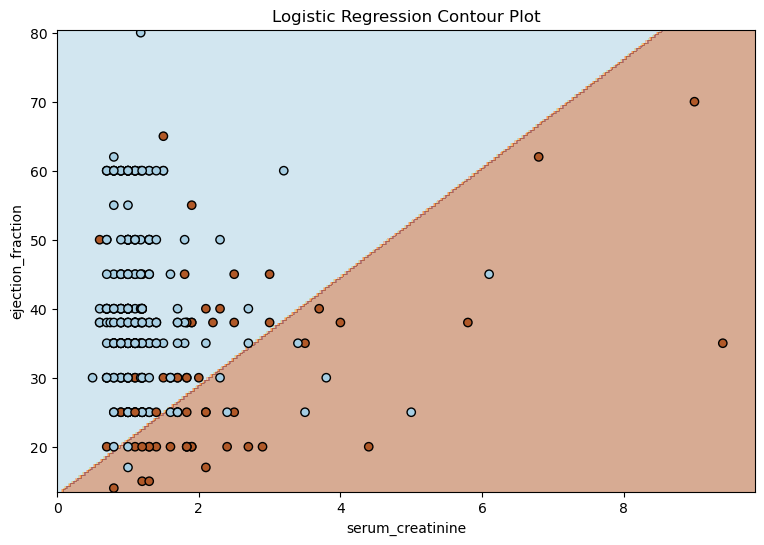

In [34]:
#Plotting: Contour Graph
plt.figure(4, figsize=(9, 6)) 
plt.contourf(f1xx, f2yy, ZLR, cmap=plt.cm.Paired, alpha=0.5)
#Scatter plotting on the graph- with all of the points from the dataset for the 2 features
plt.scatter(data['serum_creatinine'], data['ejection_fraction'], c=df.DEATH_EVENT, edgecolors='k',  cmap=plt.cm.Paired)
plt.xlabel('serum_creatinine')
plt.ylabel('ejection_fraction')
plt.xlim(f1xx.min(), f1xx.max())
plt.title('Logistic Regression Contour Plot')
plt.show()

###### Regressions

- When it came to getting the MSE and R-squared values for the Polynomial and RBF kernels, I was getting large values. Therefore once again, I will be scaling and re-running the score analysis. 
    - In this situation I will only be running the MinMaxScaler, since it has proven to be better of the two scaling methods.

In [35]:
#Linear Kernel SVM- Regression
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
Fit_lin = svr_lin.fit(data_train, data_target_train).predict(data_test) #data fitting and prediction

In [36]:
# Running some analysis on the Linear Kernel- the other 2 kernels are not compatable for this 
print("SVR- Linear Kernel")
print('Coefficients for the Model is: {}'.format(svr_lin.coef_)) #Only works for Linear SVR.
print("Mean squared error for the Model is: %.2f"% mean_squared_error(data_target_test, Fit_lin))
print('R-square for the Model is: %.2f \n' % r2_score(data_target_test, Fit_lin))

SVR- Linear Kernel
Coefficients for the Model is: [[ 0.20196799 -0.00784352]]
Mean squared error for the Model is: 0.22
R-square for the Model is: -0.08 



In [37]:
#Polynomial Kernel SVM- Regression
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
Fit_poly = svr_poly.fit(data_train, data_target_train).predict(data_test)

In [39]:
#Original Analysis- Results were not normal
print("SVR- Polynomial Kernel")
print("Mean squared error for the Model is: %.2f"% mean_squared_error(data_target_test, Fit_poly))
print('R-square for the Model is: %.2f \n' % r2_score(data_target_test, Fit_poly))

SVR- Polynomial Kernel
Mean squared error for the Model is: 102057735.98
R-square for the Model is: -496795468.60 



In [48]:
#Scaled Analysis: Results are much better (does not equate to good model performance)
Fit_poly1 = Fit_poly.reshape(-1, 1)
scaler = MinMaxScaler()
svr_poly_scaled= scaler.fit_transform(Fit_poly1)
print("SVR- Polynomial Kernel")
print("Mean squared error for the Model is: %.2f"% mean_squared_error(data_target_test, svr_poly_scaled))
print('R-square for the Model is: %.2f \n' % r2_score(data_target_test, svr_poly_scaled))

SVR- Polynomial Kernel
Mean squared error for the Model is: 0.33
R-square for the Model is: -0.60 



In [40]:
#RBF Kernel SVM- Regression
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
Fit_rbf = svr_poly.fit(data_train, data_target_train).predict(data_test)

In [41]:
#Original Analysis- Results were not normal
print("SVR- RBF Kernel")
print("Mean squared error for the Model is: %.2f"% mean_squared_error(data_target_test, Fit_rbf))
print('R-square for the Model is: %.2f \n' % r2_score(data_target_test, Fit_rbf))

SVR- RBF Kernel
Mean squared error for the Model is: 102057735.98
R-square for the Model is: -496795468.60 



In [50]:
#Scaled Analysis: Results are much better (does not equate to good model performance)
Fit_rbf1 = Fit_rbf.reshape(-1, 1)
scaler = MinMaxScaler()
svr_rbf_scaled= scaler.fit_transform(Fit_rbf1)
print("SVR- RBF Kernel")
print("Mean squared error for the Model is: %.2f"% mean_squared_error(data_target_test, svr_rbf_scaled))
print('R-square for the Model is: %.2f \n' % r2_score(data_target_test, svr_rbf_scaled))

SVR- RBF Kernel
Mean squared error for the Model is: 0.33
R-square for the Model is: -0.60 



In [51]:
#Linear Regression- Two Ideal Feature 
LinRtf = linear_model.LinearRegression() 
LinRtf.fit(data_train, data_target_train) #Fitting it to the trainings
predtf=LinRtf.predict(data_test) #prediction function
predtf

array([[ 0.3009664 ],
       [ 0.18081978],
       [ 0.3929147 ],
       [ 0.16304395],
       [ 0.16499189],
       [ 0.70216916],
       [ 0.4345545 ],
       [ 0.42262251],
       [ 0.38424601],
       [ 0.04810857],
       [-0.03517104],
       [ 0.23633952],
       [ 0.13528408],
       [ 0.12140414],
       [ 0.26604733],
       [ 0.28991131],
       [ 0.03422864],
       [ 0.22051163],
       [ 0.22245958],
       [ 0.35648614],
       [ 0.06198851],
       [ 0.13528408],
       [ 0.14638802],
       [ 0.23633952],
       [ 0.07586844],
       [ 0.0203487 ],
       [ 0.27320653],
       [ 0.54948988],
       [ 0.25932659],
       [-0.00741117],
       [ 0.20385571],
       [ 0.07976434],
       [ 0.37625877],
       [ 0.2938072 ],
       [ 0.43650245],
       [ 0.37453005],
       [ 0.27320653],
       [ 0.24544666],
       [ 0.3018433 ],
       [ 0.23156672],
       [ 0.25932659],
       [ 0.19469971],
       [ 0.32156707],
       [ 0.40874258],
       [ 0.30768714],
       [ 0

In [52]:
print('Linear Regression Model for the 2 Ideal Features:')
print('Coefficients for the Model is: {}'.format(LinRtf.coef_)) #
print("Mean squared error for the Model is: %.2f"% mean_squared_error(data_target_test, predtf))
print('R-square for the Model is: %.2f \n' % r2_score(data_target_test, predtf))
print(f'Accuracy Score of the Linear Regression is {LinRtf.score(data_test,data_target_test):f}')

Linear Regression Model for the 2 Ideal Features:
Coefficients for the Model is: [[ 0.13879935 -0.01149354]]
Mean squared error for the Model is: 0.19
R-square for the Model is: 0.06 

Accuracy Score of the Linear Regression is 0.057643


In [53]:
#Ridge Regression
RidRtf=linear_model.RidgeCV()
RidRtf.fit(data_train, data_target_train) #fitting
R_predtf=RidRtf.predict(data_test)
R_predtf

array([[ 0.30173673],
       [ 0.18501937],
       [ 0.39360297],
       [ 0.16393737],
       [ 0.16778188],
       [ 0.69593736],
       [ 0.43378188],
       [ 0.42423343],
       [ 0.38209455],
       [ 0.04910457],
       [-0.03125326],
       [ 0.23859125],
       [ 0.13715142],
       [ 0.12375845],
       [ 0.26922171],
       [ 0.28831862],
       [ 0.03571159],
       [ 0.22135377],
       [ 0.22519828],
       [ 0.35530861],
       [ 0.06249754],
       [ 0.13715142],
       [ 0.1478658 ],
       [ 0.23859125],
       [ 0.07589051],
       [ 0.02231862],
       [ 0.27495079],
       [ 0.54861468],
       [ 0.26155781],
       [-0.00446732],
       [ 0.2052822 ],
       [ 0.08357954],
       [ 0.3775314 ],
       [ 0.29600766],
       [ 0.4376264 ],
       [ 0.37271947],
       [ 0.27495079],
       [ 0.24816484],
       [ 0.29786708],
       [ 0.23477187],
       [ 0.26155781],
       [ 0.19841234],
       [ 0.3227936 ],
       [ 0.41084046],
       [ 0.30940063],
       [ 0

In [54]:
print('Ridge Regression Model for the 2 Ideal Features:')
print('Coefficients for the Model is: {}'.format(RidRtf.coef_)) #
print("Mean squared error for the Model is: %.2f"% mean_squared_error(data_target_test, R_predtf))
print('R-square for the Model is: %.2f \n' % r2_score(data_target_test, R_predtf))
print(f'Accuracy Score of the Ridge Regression is {RidRtf.score(data_test, data_target_test):f}')

Ridge Regression Model for the 2 Ideal Features:
Coefficients for the Model is: [[ 0.13392971 -0.01148328]]
Mean squared error for the Model is: 0.19
R-square for the Model is: 0.06 

Accuracy Score of the Ridge Regression is 0.058932


###### Visualization- Regressions

Text(0.5, 1.0, "['SVR:RBF Kernel']")

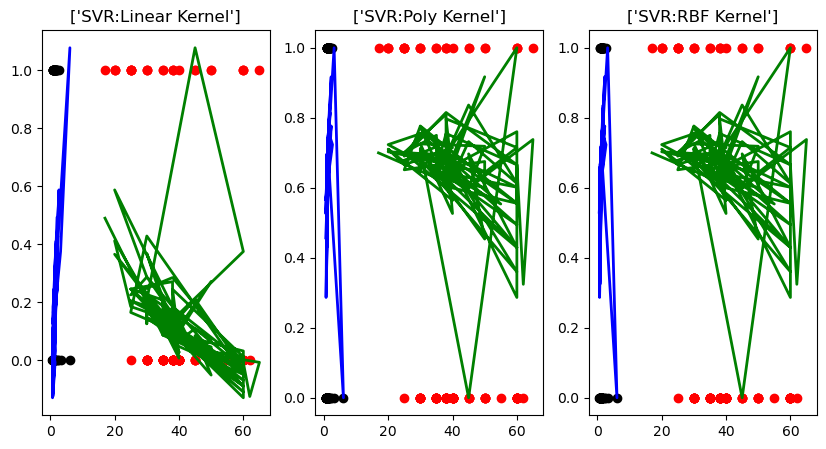

In [59]:
#Scatter Plot for Linear and Ridge Regressions with the predictions
fig2,([ax1,ax2,ax3])=plt.subplots(1,3, figsize=(10, 5)) #Edited figsize for better view

#SVM Linear Kernel Regression Info:
ax1.scatter(data_test['serum_creatinine'], data_target_test,  color='black') #with Targets
ax1.scatter(data_test['ejection_fraction'], data_target_test,  color='red')
ax1.plot(data_test['serum_creatinine'], Fit_lin,  color='blue', linewidth=2) #with predictions - FIT LINE
ax1.plot(data_test['ejection_fraction'], Fit_lin,  color='green', linewidth=2)
ax1.set_title(['SVR:Linear Kernel'])
#SVM Polynomial Kernel Regression Info:
ax2.scatter(data_test['serum_creatinine'], data_target_test,  color='black') #with Targets
ax2.scatter(data_test['ejection_fraction'], data_target_test,  color='red')
ax2.plot(data_test['serum_creatinine'], svr_poly_scaled,  color='blue', linewidth=2) #with predictions - FIT LINE
ax2.plot(data_test['ejection_fraction'], svr_poly_scaled,  color='green', linewidth=2)
ax2.set_title(['SVR:Poly Kernel'])
#SVM RBF Kernel Regression Info:
ax3.scatter(data_test['serum_creatinine'], data_target_test,  color='black') #with Targets
ax3.scatter(data_test['ejection_fraction'], data_target_test,  color='red')
ax3.plot(data_test['serum_creatinine'], svr_rbf_scaled,  color='blue', linewidth=2) # with predictions
ax3.plot(data_test['ejection_fraction'], svr_rbf_scaled,  color='green', linewidth=2)
ax3.set_title(['SVR:RBF Kernel'])

Text(0.5, 1.0, "['Ridge Regression']")

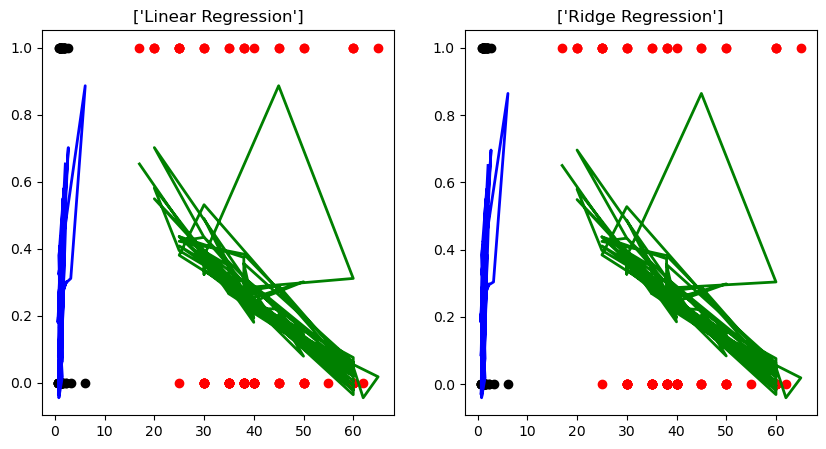

In [57]:
#Scatter Plot for Linear and Ridge Regressions with the predictions
fig1,([ax1,ax2])=plt.subplots(1,2, figsize=(10, 5)) #Edited figsize for better view

#Linear Regression Info:
ax1.scatter(data_test['serum_creatinine'], data_target_test,  color='black') #with Targets
ax1.scatter(data_test['ejection_fraction'], data_target_test,  color='red')
ax1.plot(data_test['serum_creatinine'], predtf,  color='blue', linewidth=2) #with predictions - FIT LINE
ax1.plot(data_test['ejection_fraction'], predtf,  color='green', linewidth=2)
ax1.set_title(['Linear Regression'])
#Ridge Regression Info:
ax2.scatter(data_test['serum_creatinine'], data_target_test,  color='black') #with Targets
ax2.scatter(data_test['ejection_fraction'], data_target_test,  color='red')
ax2.plot(data_test['serum_creatinine'], R_predtf,  color='blue', linewidth=2) # with predictions
ax2.plot(data_test['ejection_fraction'], R_predtf,  color='green', linewidth=2)
ax2.set_title(['Ridge Regression'])

# D. Discussion

Now that we are working with two features only there is not too many issues with runtime and kernels, therefore we are allowed to test the model more. Specifically in the SVM realm.
###### Classifications:
- SVM Linear Kernel: Accuracy Score: 0.744444. In the contour graph most of the blue dots fall with in the blue shade while the brown dots travel between the blue and brown contours. Visually this represents the retrieved accuracy score in which targets fall within the predictions. The two ideal features used were good enough to train the model for a good accuracy score.
- SVM Polynomial Kernel: Accuracy Score: 0.744444. Similar to the LinearSVM, blue dots fall mostly within the blue shade while the brown dots are a mix between both contours. The contouring is interesting in this visually, with ridges of colors. Although it is the same as the LinearSVM interms of accuracy score, visually the prediction model is different. 
- SVM RBF Kernel: Accuracy Score: 0.733333. The RBF began with a slight decrease in accuracy in comparison to the previous two SVMs. This visualization is the most interesting of the classifications because of the sectors of brown contouring within a larger blue contour. The prediction model is very specific and has more blue than brown in predictions. Regardless, the plots seem to be moderately accurate within the correct contours reflecting the accuracy score.
- Logistic Regression: Accuracy Score: 0.733333. Visually the Logistic regression is similar to the Linear SVM, but with more blue contouring overall. Since the plots fall in the same place in every graph it would make sense the increase in one contouring affects the accuracy score. In this case a lower accuracy score than Linear and Polynomial SVM but the same as RBF SVM. The two ideal features presented an average model with the logistic regression.


- Overall, the classifications all fall around the same area/score in terms of accuracy. The different methods complement eachother. Regression of the ideal features has a mix of complementation and difference between models.

###### Regressions:
SVM:
- SVR Linear Kernel: Had a MSE score of 0.22 and a negative R-squared value of -0.08. These values are not representative of a good model and the visualization proves it. The scatter/line plot for the SVM Linear shows a negatively correlated prediction model as the lines do not really match well with the scatters. The model is not good with the ideal features.
- SVR Polynomial Kernel **AND** RBF Kernel both: Required for me to scale the prediction values before analyzing. They both had a MSE of 0.33 and a negative R-squared value of -0.60. Based on these values these are both bad models with a MSE value that is close to 0 but is paired with a negative corrlation in the R-squared. Even the visualization is the same for these models and they show the poor performance of the model.

- BOTH the Linear Regression and the Ridge Regression performed similarly. They both achived a MSE score of 0.19 and a R-squared value of 0.06. This MSE value is the best so far as it is the lowest and it is paired with the best R-squared value so far as it is the highest. Although comparitively these are the best model performance observed thus far, they do not reflect in the accuracy score. The linear regression's Accuracy score was 0.057643 and the ridge regression's was 0.058932. The bad accuracy scores are visualized in the graph as the lines (predictive values) are no where in correlation with the actual targets.
***
###### Conclusion
- It seems that the ideal features did not perform well in any of the models presented here. It is interesting because serum creatinine and ejection fraction are famously known to be correlated with heart failure. It is surprising to see these features perform so poorly. 
- In terms of best model; for classification Linear SVM might be a safe bet eventhough all of the models performed similarly. For regression the Ridge Regression model slightly edges the others with the best accuracy score.

- My Hypothesis was proven Correct as the models performed poorly. These continuous values are not easy to train with when it comes to predicting categorical targets.

###### Reflection
- This outcome makes me wonder: if I can check the features to see correlation between them and determine the two best features (to keep it similar to the researchers) to predict Heart Failure to potentially see a better model than the ones with the ideal features.
- For this I ran a correlation heat map (below) to see which features are most related to the target. 
- **Based on the heat map the two highly correlated features were *Age and Serum Creatinine.***
- Running the Logistic Regression for the Newly Found Features and all Features datasets (below) will allow for a new type of visualization: AUC Curve.
    - For the Newly Found Features the Logistic Regression accuracy was 0.766667 which is slightly higher than the Ideal Features accuracy by a little, not enough to have a different outcome in the AUC graph. Although they look different the Area under the Curve is 0.67 for both. It is interesting to see even with my purposeful feature selection the model performance is the same as the researcher's Ideal features.
    - I included the dataset with all feature (below) for comparison purposes, typically the dataset/model with all of the features should perform better than a feature selected model. That is seen here with a high accuracy score of 0.833333 for logistic regression and a high AUC value of 0.83. 

<AxesSubplot:>

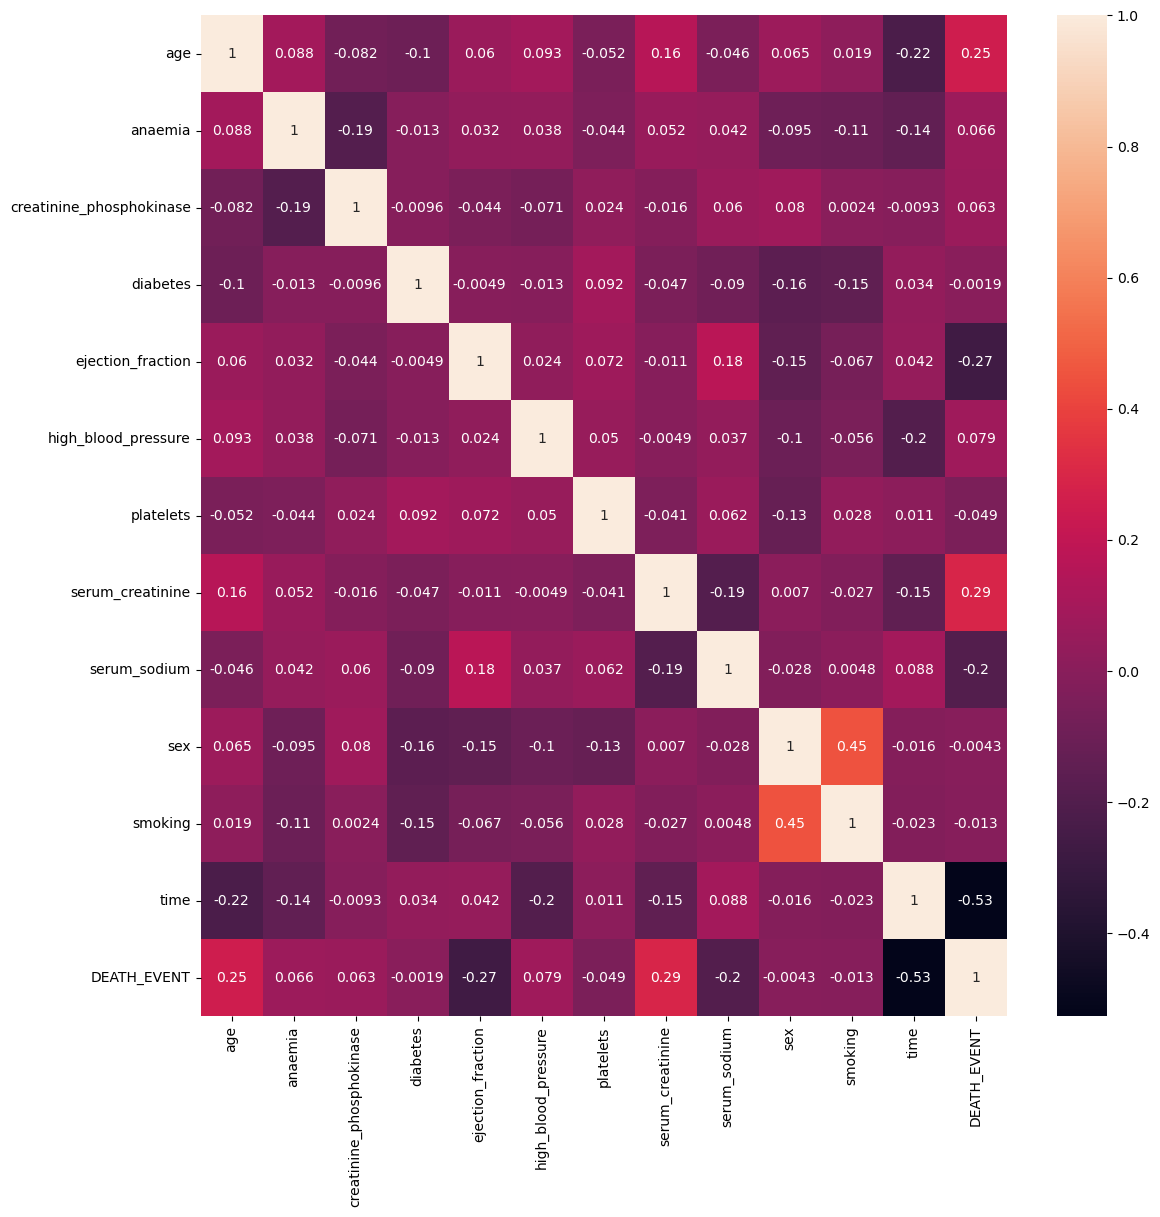

In [60]:
# Correlation Heat Map
import seaborn as sns
import matplotlib.pyplot as plt
corr1 = df.corr() 
plt.figure(figsize=(13,13))
sns.heatmap(corr1, annot = True)

### Finding New Features for better model:

In [70]:
#Feature Selection: New Found Features Dataset.
data2 = df[['age','serum_creatinine']].copy()
data_full = df.drop(columns=['DEATH_EVENT'])

In [71]:
#Splitting Data
data2_train, data2_test, data2_target_train, data2_target_test = train_test_split(data2, data_target, test_size=0.30, random_state=55)
dataf_train, dataf_test, dataf_target_train, dataf_target_test = train_test_split(data_full, data_target, test_size=0.30, random_state=55)

In [75]:
#Logistic Regressions to check the newly found features' performance.
nfLR = LogisticRegressionCV(random_state=0, solver='lbfgs',cv=5)
nfLR = nfLR.fit(data2_train,np.ravel(data2_target_train.values)) 
#Accuracy score
print(f'Accuracy Score of the LR model with the 2 new Features is {nfLR.score(data2_test,data2_target_test):f}')

Accuracy Score of the LR model with the 2 new Features is 0.766667


In [73]:
#Logistic Regressions to check the newly found features' performance.
fullLR = LogisticRegressionCV(random_state=0, solver='lbfgs',cv=5)
fullLR = fullLR.fit(dataf_train,np.ravel(dataf_target_train.values)) 
#Accuracy score
print(f'Accuracy Score of the LR model with the ALL Features is {fullLR.score(dataf_test,dataf_target_test):f}')

Accuracy Score of the LR model with the ALL Features is 0.833333


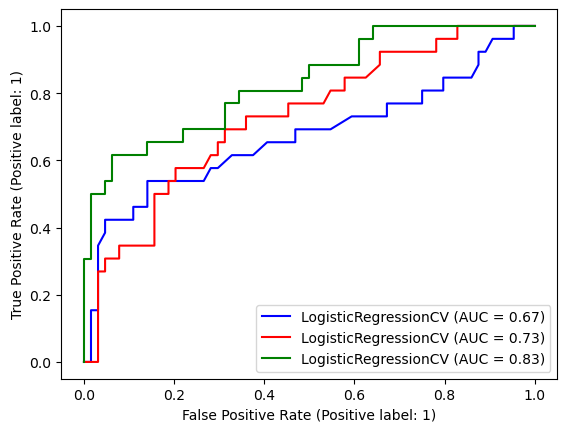

In [74]:
fig1,ax1=plt.subplots(1,1)
plot_roc_curve(tfLR,data_test,data_target_test,color='blue',ax=ax1) #Logistic Regression: Ideal Features
plot_roc_curve(nfLR,data2_test,data2_target_test,color='red',ax=ax1) #Newly Found Features
plot_roc_curve(fullLR,dataf_test,dataf_target_test,color='green',ax=ax1) #ALL Features

#Explaination above in Reflection.

Reference:

Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5